# A study of classification of images using different Neural Network models
Team Members: Srujana Alajangi, Prashanth Kumar Manji

In [ ]:
#Importing necessary libraries
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

### Loading the data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print('x_train.shape  :', x_train.shape)
print('y_train.shape  :', y_train.shape)
print('x_test.shape   :', x_test.shape)
print('y_test.shape   :', y_test.shape)

x_train.shape  : (50000, 32, 32, 3)
y_train.shape  : (50000, 1)
x_test.shape   : (10000, 32, 32, 3)
y_test.shape   : (10000, 1)


### Plotting first few images

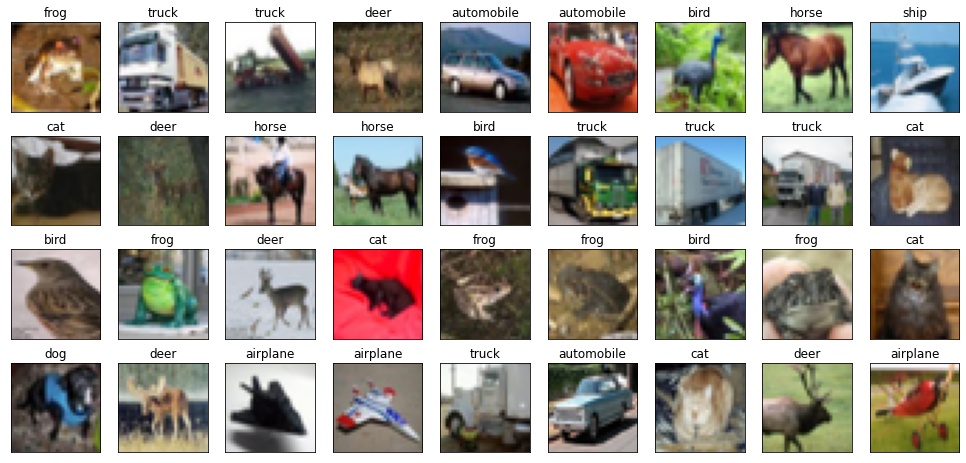

In [ ]:
# creating a list of category names in alphabetical order
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 
          'horse', 'ship', 'truck']

fig, axes = plt.subplots(ncols=9, nrows=4, figsize=(17, 8))
index = 0
for i in range(4):
    for j in range(9):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(x_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

### Normalization

In [ ]:
# normalize to range 0-1
x_train_norm = x_train / 255
x_test_norm = x_test / 255

### One-hot encoding

In [ ]:
#One-hot encoding the labels
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot = to_categorical(y_test,10)

## CNN Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model

In [ ]:
input_shape = (32, 32, 3)
num_classes = 10

In [ ]:
def CNN_model():
    # initialized a sequential model
    CNN_model = Sequential()
    # conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
    #input_shape denotes input image dimension of CIFAR images
    CNN_model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
                         padding='same', input_shape=input_shape))
    
    # conv layer with 32 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
    CNN_model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
                         padding='same'))
    
    #max pooling layer, pool size 2X2, stride 2 in both dimensions,
    #max pooling layer stride default given by pool size
    CNN_model.add(MaxPool2D((2, 2)))

    #dropout layer with probability 25% of dropout, to prevent overfitting
    CNN_model.add(Dropout(0.25))
    
    #below 4 layers are same as before with 64 filters
    CNN_model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
                         padding='same'))
    CNN_model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
                         padding='same'))
    CNN_model.add(MaxPool2D((2, 2)))
    CNN_model.add(Dropout(0.25))

    #fully connected layer
    CNN_model.add(Flatten())
    CNN_model.add(Dense(512, activation='relu'))

    # another dropout layer with 50% probability
    CNN_model.add(Dropout(0.5))

    #output with softmax as activation gives the probability of each class
    CNN_model.add(Dense(num_classes, activation='softmax'))
    
    #compiling the model
    CNN_model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', metrics=['accuracy'])
    return CNN_model

In [ ]:
CNN  = CNN_model()

In [ ]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
# training the model
history = CNN.fit(x_train_norm,y_train_one_hot, batch_size=32,epochs=20, 
               validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 10s 6ms/step - loss: 1.5160 - accuracy: 0.4494 - val_loss: 1.1684 - val_accuracy: 0.5886
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0858 - accuracy: 0.6159 - val_loss: 0.9420 - val_accuracy: 0.6602
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9238 - accuracy: 0.6752 - val_loss: 0.8166 - val_accuracy: 0.7195
Epoch 4/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8261 - accuracy: 0.7114 - val_loss: 0.7784 - val_accuracy: 0.7264
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7576 - accuracy: 0.7345 - val_loss: 0.7470 - val_accuracy: 0.7375
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7011 - accuracy: 0.7534 - val_loss: 0.6888 - val_accuracy: 0.7576
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6536 - accuracy: 0.7698 - val_loss: 0.6738 - val_accuracy

### CNN Model Accuracy

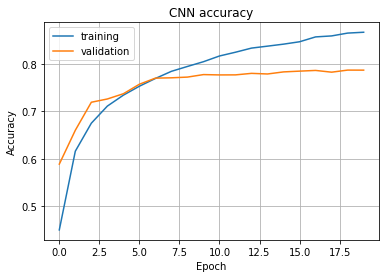

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('CNN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

### CNN Model Loss

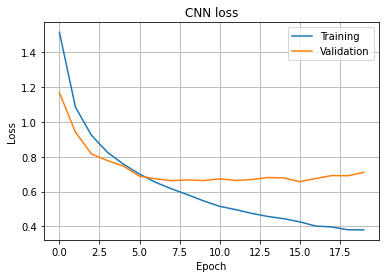

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.grid()
plt.title('CNN loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Training', 'Validation'], loc='upper right') 
plt.show() 

### CNN Evaluation

In [ ]:
CNN_predictions = CNN.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


In [ ]:
CNN_acc = CNN.evaluate(x_test_norm,y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.7423 - accuracy: 0.7782


In [ ]:
print('CNN model accuracy on the test data: ',
      CNN_acc*100,'%')

CNN model accuracy on the test data:  77.81999707221985 %


### CNN Confusion Matrix

In [ ]:
import numpy as np
CNN_pred_classes = np.argmax(CNN_predictions,axis = 1) 

In [ ]:
from sklearn.metrics import confusion_matrix
CNN_cm = confusion_matrix(y_test, CNN_pred_classes)

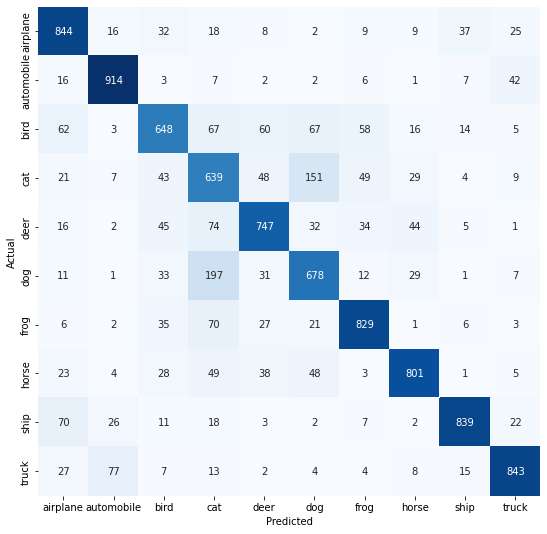

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(CNN_cm, cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt='d', annot=True, 
            cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ResNet

In [ ]:
#Importing necessary libraries
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import UpSampling2D, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model

In [ ]:
def ResNet_model():
    ResNet = ResNet50(weights = 'imagenet', 
                          include_top = False, 
                          input_shape = [224,224,3]) 
    for layer in ResNet.layers:
        layer.trainable = False

    inputs = Input((32, 32, 3))

    upscale = UpSampling2D((7,7))(inputs)

    base_model_output = ResNet(upscale)
    
    x = GlobalAveragePooling2D()(base_model_output)
    x = Flatten()(x)
    x = Dense(1024, activation="relu")(x)
    x = Dense(512, activation="relu")(x)
    outputs = Dense(10, activation="softmax")(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='SGD', 
               loss='categorical_crossentropy',
               metrics = ['accuracy'])

    return model

In [ ]:
ResNet = ResNet_model()

In [ ]:
ResNet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              209817

In [ ]:
history = ResNet.fit(x_train, y_train_one_hot, epochs=10, validation_split= 0.30, batch_size=64)

Epoch 1/10
547/547 [==============================] - 147s 262ms/step - loss: 1.0551 - accuracy: 0.6307 - val_loss: 0.8573 - val_accuracy: 0.6987
Epoch 2/10
547/547 [==============================] - 140s 257ms/step - loss: 0.7718 - accuracy: 0.7317 - val_loss: 0.7819 - val_accuracy: 0.7281
Epoch 3/10
547/547 [==============================] - 141s 258ms/step - loss: 0.6884 - accuracy: 0.7588 - val_loss: 0.7317 - val_accuracy: 0.7404
Epoch 4/10
547/547 [==============================] - 140s 257ms/step - loss: 0.6309 - accuracy: 0.7782 - val_loss: 0.7233 - val_accuracy: 0.7463
Epoch 5/10
547/547 [==============================] - 140s 256ms/step - loss: 0.5907 - accuracy: 0.7923 - val_loss: 0.6651 - val_accuracy: 0.7659
Epoch 6/10
547/547 [==============================] - 181s 331ms/step - loss: 0.5583 - accuracy: 0.8038 - val_loss: 0.6274 - val_accuracy: 0.7791
Epoch 7/10
547/547 [==============================] - 141s 257ms/step - loss: 0.5297 - accuracy: 0.8143 - val_loss: 0.7402 -

### ResNet Model Accuracy

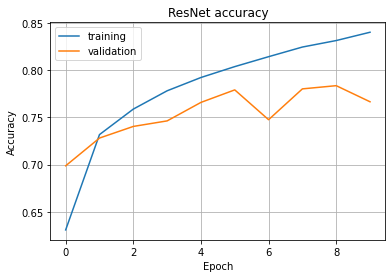

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.title('ResNet accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

### ResNet Model Loss

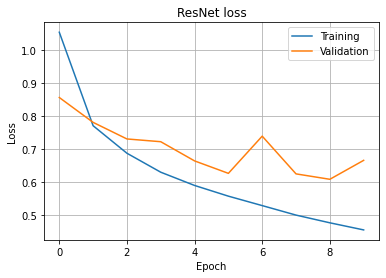

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.grid()
plt.title('ResNet loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Training', 'Validation'], loc='upper right') 
plt.show() 

### ResNet Evaluation

In [ ]:
ResNet_predictions = ResNet.predict(x_test)

313/313 [==============================] - 31s 93ms/step


In [ ]:
ResNet_acc = ResNet.evaluate(x_test,y_test_one_hot, batch_size=32)[1]

313/313 [==============================] - 29s 94ms/step - loss: 0.6660 - accuracy: 0.7707


In [ ]:
print('The accuracy of the ResNet model on the test set is: ', ResNet_acc*100,'%')

The accuracy of the ResNet model on the test set is:  77.06999778747559 %


### ResNet Confusion Matrix

In [ ]:
ResNet_pred_classes = np.argmax(ResNet_predictions,axis = 1) 
ResNet_cm = confusion_matrix(y_test, ResNet_pred_classes)

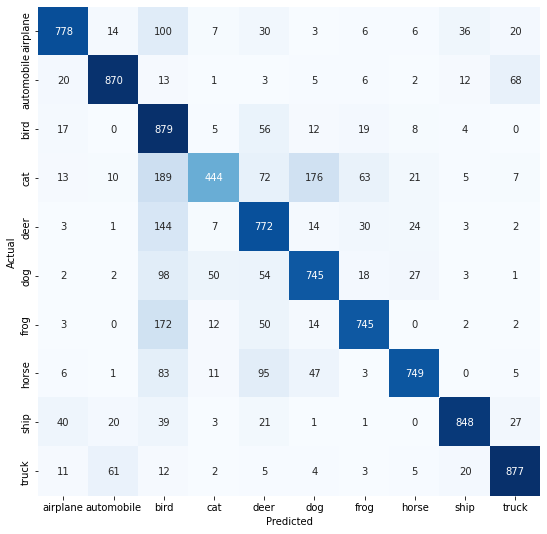

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(ResNet_cm, cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt='d', annot=True, 
            cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



## VGG


In [ ]:
#Importing necessary libraries
from tensorflow.keras import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, Adamax

In [ ]:
def vgg_model():
    vgg = VGG16(weights = 'imagenet', 
                          include_top = False, 
                          input_shape = [32,32,3]) 
    for layer in vgg.layers:
        layer.trainable = False

    transfer_layer = vgg.get_layer('block3_pool')

    x = Flatten()(transfer_layer.output) #Flatten the output from the 3rd block of the VGG16 model
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    pred = Dense(10, activation='softmax')(x)

    model = Model(vgg.inputs, pred)
    
    model.compile(loss='categorical_crossentropy',
              optimizer=Adamax(learning_rate = 0.0005),
              metrics=['accuracy'])
    return model

In [ ]:
VGG = vgg_model()

In [ ]:
VGG.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
history_3 = VGG.fit(
            x_train_norm, y_train_one_hot,
            epochs=20,
            batch_size=250,
            validation_split=0.1,
            verbose=2
)

Epoch 1/20
180/180 - 12s - loss: 1.3427 - accuracy: 0.5426 - val_loss: 0.9399 - val_accuracy: 0.7064 - 12s/epoch - 68ms/step
Epoch 2/20
180/180 - 10s - loss: 0.8188 - accuracy: 0.7256 - val_loss: 0.7409 - val_accuracy: 0.7660 - 10s/epoch - 55ms/step
Epoch 3/20
180/180 - 10s - loss: 0.6350 - accuracy: 0.7878 - val_loss: 0.6836 - val_accuracy: 0.7794 - 10s/epoch - 55ms/step
Epoch 4/20
180/180 - 10s - loss: 0.5128 - accuracy: 0.8313 - val_loss: 0.5704 - val_accuracy: 0.8094 - 10s/epoch - 56ms/step
Epoch 5/20
180/180 - 10s - loss: 0.4143 - accuracy: 0.8650 - val_loss: 0.5203 - val_accuracy: 0.8236 - 10s/epoch - 54ms/step
Epoch 6/20
180/180 - 10s - loss: 0.3276 - accuracy: 0.8941 - val_loss: 0.5106 - val_accuracy: 0.8322 - 10s/epoch - 54ms/step
Epoch 7/20
180/180 - 10s - loss: 0.2509 - accuracy: 0.9212 - val_loss: 0.5192 - val_accuracy: 0.8334 - 10s/epoch - 55ms/step
Epoch 8/20
180/180 - 10s - loss: 0.1855 - accuracy: 0.9440 - val_loss: 0.4828 - val_accuracy: 0.8458 - 10s/epoch - 56ms/step


### VGG Model Accuracy

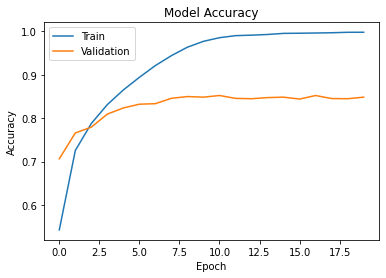

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### VGG Evaluation

In [ ]:
Vgg_acc = VGG.evaluate(x_test_norm,y_test_one_hot)[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.6962 - accuracy: 0.8490


In [ ]:
from sklearn.metrics import classification_report
y_pred_test = VGG.predict(x_test_norm)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
print(classification_report(y_test, y_pred_test_classes))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1000
           1       0.94      0.90      0.92      1000
           2       0.79      0.84      0.82      1000
           3       0.69      0.73      0.71      1000
           4       0.87      0.78      0.82      1000
           5       0.77      0.77      0.77      1000
           6       0.90      0.88      0.89      1000
           7       0.85      0.90      0.87      1000
           8       0.92      0.92      0.92      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## EfficientNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D


In [ ]:
def efnb0_model():
  efnb0 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=[224,224,3], classes=10)
  for layer in efnb0.layers:
    layer.trainable = False
  
  inputs = Input((32, 32, 3))

  upscale = UpSampling2D((7,7))(inputs)

  base_model_output = efnb0(upscale)
   
  x = GlobalAveragePooling2D()(base_model_output)
  x = Flatten()(x)
  x = Dropout(0.2)(x)

  outputs = Dense(10, activation="softmax")(x)

  model = Model(inputs, outputs)
  model.compile(optimizer='SGD', 
               loss='categorical_crossentropy',
               metrics = ['accuracy'])

 
  return model

In [ ]:
efnb0 = efnb0_model()

In [ ]:
history_4 = efnb0.fit(x_train, y_train_one_hot, batch_size=32, 
                  epochs= 30, 
                  validation_split=0.2)

Epoch 1/30
1250/1250 [==============================] - 98s 74ms/step - loss: 1.6412 - accuracy: 0.4383 - val_loss: 1.3544 - val_accuracy: 0.5473
Epoch 2/30
1250/1250 [==============================] - 90s 72ms/step - loss: 1.3567 - accuracy: 0.5397 - val_loss: 1.2256 - val_accuracy: 0.5953
Epoch 3/30
1250/1250 [==============================] - 90s 72ms/step - loss: 1.2715 - accuracy: 0.5694 - val_loss: 1.1605 - val_accuracy: 0.6128
Epoch 4/30
1250/1250 [==============================] - 90s 72ms/step - loss: 1.2223 - accuracy: 0.5840 - val_loss: 1.1179 - val_accuracy: 0.6286
Epoch 5/30
1250/1250 [==============================] - 90s 72ms/step - loss: 1.1880 - accuracy: 0.5921 - val_loss: 1.0848 - val_accuracy: 0.6388
Epoch 6/30
1250/1250 [==============================] - 90s 72ms/step - loss: 1.1633 - accuracy: 0.6024 - val_loss: 1.0588 - val_accuracy: 0.6549
Epoch 7/30
1250/1250 [==============================] - 90s 72ms/step - loss: 1.1439 - accuracy: 0.6075 - val_loss: 1.0421 -

### EfficientNet accuracy

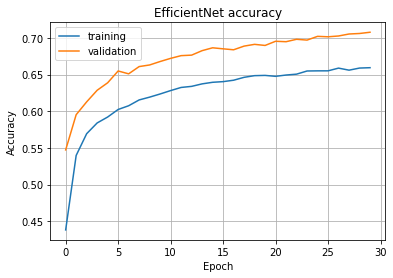

In [ ]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.grid()
plt.title('EfficientNet accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

### EfficientNet Loss

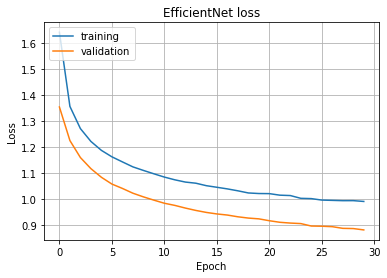

In [ ]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.grid()
plt.title('EfficientNet loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

### EfficientNet Evaluation

In [ ]:
efnb0_acc = efnb0.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 19s 60ms/step - loss: 0.8786 - accuracy: 0.7042


In [ ]:
print('The accuracy of the EfficientNet model on the test set is: ', efnb0_acc*100,'%')

The accuracy of the EfficientNet model on the test set is:  70.4200029373169 %


In [ ]:
y_pred_test = efnb0.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 [==============================] - 17s 55ms/step


In [ ]:
print(classification_report(y_test, y_pred_test_classes))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1000
           1       0.77      0.82      0.79      1000
           2       0.66      0.55      0.60      1000
           3       0.56      0.59      0.58      1000
           4       0.62      0.68      0.65      1000
           5       0.67      0.58      0.62      1000
           6       0.65      0.79      0.71      1000
           7       0.78      0.72      0.75      1000
           8       0.77      0.82      0.79      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

